<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/4_2_Spectral_Graph_Bipartitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.2** Spectral Graph Bipartitioning

Graph partition aims to find out a partition such that the cut (the total number of edges between two disjoint sets of nodes) is minimized. For a weighted graph $G=(V, E)$, given a bipartition of $\mathrm{V}$ into disjoint $V_{1}$ and $V_{2}$ $\left(V_{1} \cup V_{2}=V\right)$, the cut between them can be defined as
$$
\operatorname{cut}\left(V_{1}, V_{2}\right)=\sum_{i \in V_{1}, j \in V_{2}} M_{i j}
$$
The definition of cut is easily extended to $k$ vertex subsets
$$
\operatorname{cut}\left(V_{1} V_{2}, \ldots . V_{k}\right)=\sum_{i<j} \operatorname{cut}\left(V_{i}, V_{j}\right)
$$
The classical graph bipartitioning problem is to find nearly equally-sized vertex subset $V_{i}, V_{2}$ of $\mathrm{V}$ such that $\operatorname{cut}\left(V_{1}^{*}, V_{2}^{*}\right)=\min _{V_{1}, V_{2}}$ cut $\left(V_{1}, V_{2}\right)$. For this purpose, let us define the partition vector $\mathbf{p}$ that captures this division.
$$
p_{i}=\left\{\begin{array}{l}
+1, i \in V_{1}, \\
-1, i \in V_{2} .
\end{array}\right.
$$
The cut can be characterized by the Rayleigh Quotient as follows.


>    Lemma $4.2 .1$ Given the Laplacian matrix $\mathrm{L}$ of $\mathrm{G}$ and a partition vector $\mathbf{p}$, the Rayleigh Quotient
$$
\frac{\mathbf{p}^{T} L \mathbf{p}}{\mathbf{p}^{T} \mathbf{p}}=\frac{1}{n} \cdot 4 \operatorname{cut}\left(V_{1}, V_{2}\right)
$$

Example 4.2.3 Two commonly used variants are ratio cut and normalized cut. Let $\pi=\left(C_{1}, C_{2}, \cdots, C_{k}\right)$ be a graph partition such that $C_{i} \cap C_{j}=\varnothing$ and $\cup_{i=1}^{k} C_{i}=V$. The ratio cut and the normalized cut are defined as:
$$
\operatorname{Ratio} \operatorname{Cut}(\pi)=\sum_{i=1}^{k} \frac{\operatorname{cut}\left(C_{i}, \bar{C}_{i}\right)}{\left|C_{i}\right|}
$$
$$\operatorname{Normalized} \operatorname{Cut}(\pi)=\sum_{i=1}^{k} \frac{\operatorname{cut}\left(C_{i}, \bar{C}_{i}\right)}{\operatorname{vol}\left(C_{i}\right)} .$$
where $\bar{C}_{i}$ is the complement of $C_{i}$, and $\operatorname{vol}\left(C_{i}\right)=\sum_{j \in C_{i}} d_{j}$, where $d_{j}$ is the degree of node $j$. Both objectives attempt to minimize the number of edges between communities, yet avoid the bias of trivial-size communities like singletons.
Given a graph in Figure $4.3$, the green cut (thick dashed line) between two sets of nodes $1,2,3,4$ and $5,6,7,8,9$ with $C_{1}=\{9\}$ and $C_{2}=\{1,2,3,4,5,6,7,8\} .$ Let this partition be denoted as $\pi_{1}$. It follows that $\operatorname{cut}\left(C_{i}, \bar{C}_{i}\right)=1,\left|C_{1}\right|=1,\left|C_{2}\right|=8, \operatorname{vol}\left(C_{1}\right)=1$, and $\operatorname{vol}\left(C_{2}\right)=27$. Consequently,
$\operatorname{Ratio} \operatorname{Cut}\left(\pi_{1}\right)=\frac{1}{1}+\frac{1}{8}=1.12$
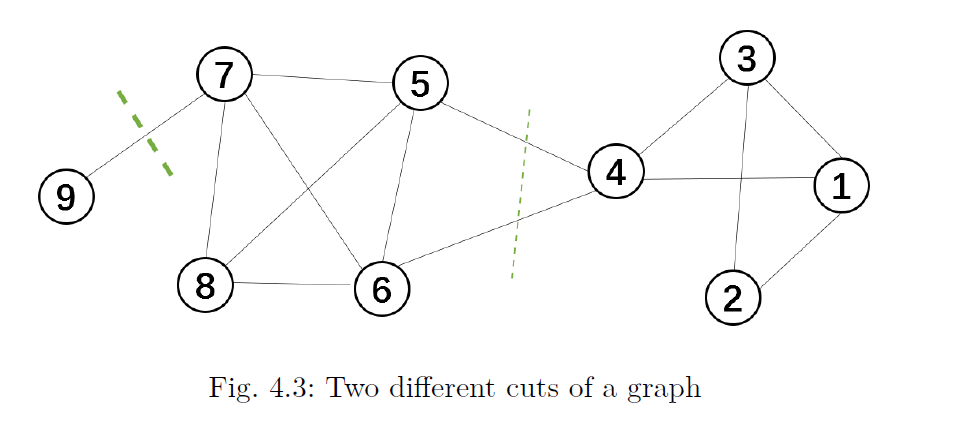


$$ Normalized \operatorname{Cut}\left(\pi_{1}\right)=\frac{1}{1}+\frac{1}{27}=1.04$$
Now for another more balanced partition $\pi_{2}$ (thin dashed lines) with $C_{1}=$ $1,2,3,4$, and $C_{2}=5,6,7,8,9$, we have
Ratio $\operatorname{Cut}\left(\pi_{2}\right)=\frac{2}{4}+\frac{2}{5}=0.9<$ Ratio $\operatorname{Cut}\left(\pi_{1}\right)$
Normalized $\operatorname{Cut}\left(\pi_{2}\right)=\frac{2}{12}+\frac{2}{16}=0.3<$ Normalized $\operatorname{Cut}\left(\pi_{1}\right)$
Though the cut of partition $\pi_{1}$ is smaller, partition $\pi_{2}$ is preferable based on the ratio cut or the normalized cut.

## Spectral Clustering in Python using `sklearn`

Apply clustering to a projection of the normalized Laplacian.

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

If the affinity matrix is the adjacency matrix of a graph, this method can be used to find normalized graph cuts [1], [2].

When calling `fit`, an affinity matrix is constructed using either a kernel function such the Gaussian (aka RBF) kernel with Euclidean distance `d(X, X)`:


```
np.exp(-gamma * d(X,X) ** 2)
```

or a k-nearest neighbors connectivity matrix.

### Notes

A distance matrix for which 0 indicates identical elements and high values indicate very dissimilar elements can be transformed into an affinity / similarity matrix that is well-suited for the algorithm by applying the Gaussian (aka RBF, heat) kernel:

```
np.exp(- dist_matrix ** 2 / (2. * delta ** 2))
```
where `delta` is a free parameter representing the width of the Gaussian kernel.

An alternative is to take a symmetric version of the k-nearest neighbors connectivity matrix of the points.

If the `pyamg` package is installed, it is used: this greatly speeds up computation.

### [Comparing different clustering algorithms on toy datasets](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)

This example shows characteristics of different clustering algorithms on datasets that are “interesting” but still in 2D. With the exception of the last dataset, the parameters of each of these dataset-algorithm pairs has been tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.

The last dataset is an example of a ‘null’ situation for clustering: the data is homogeneous, and there is no good clustering. For this example, the null dataset uses the same parameters as the dataset in the row above it, which represents a mismatch in the parameter values and the data structure.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


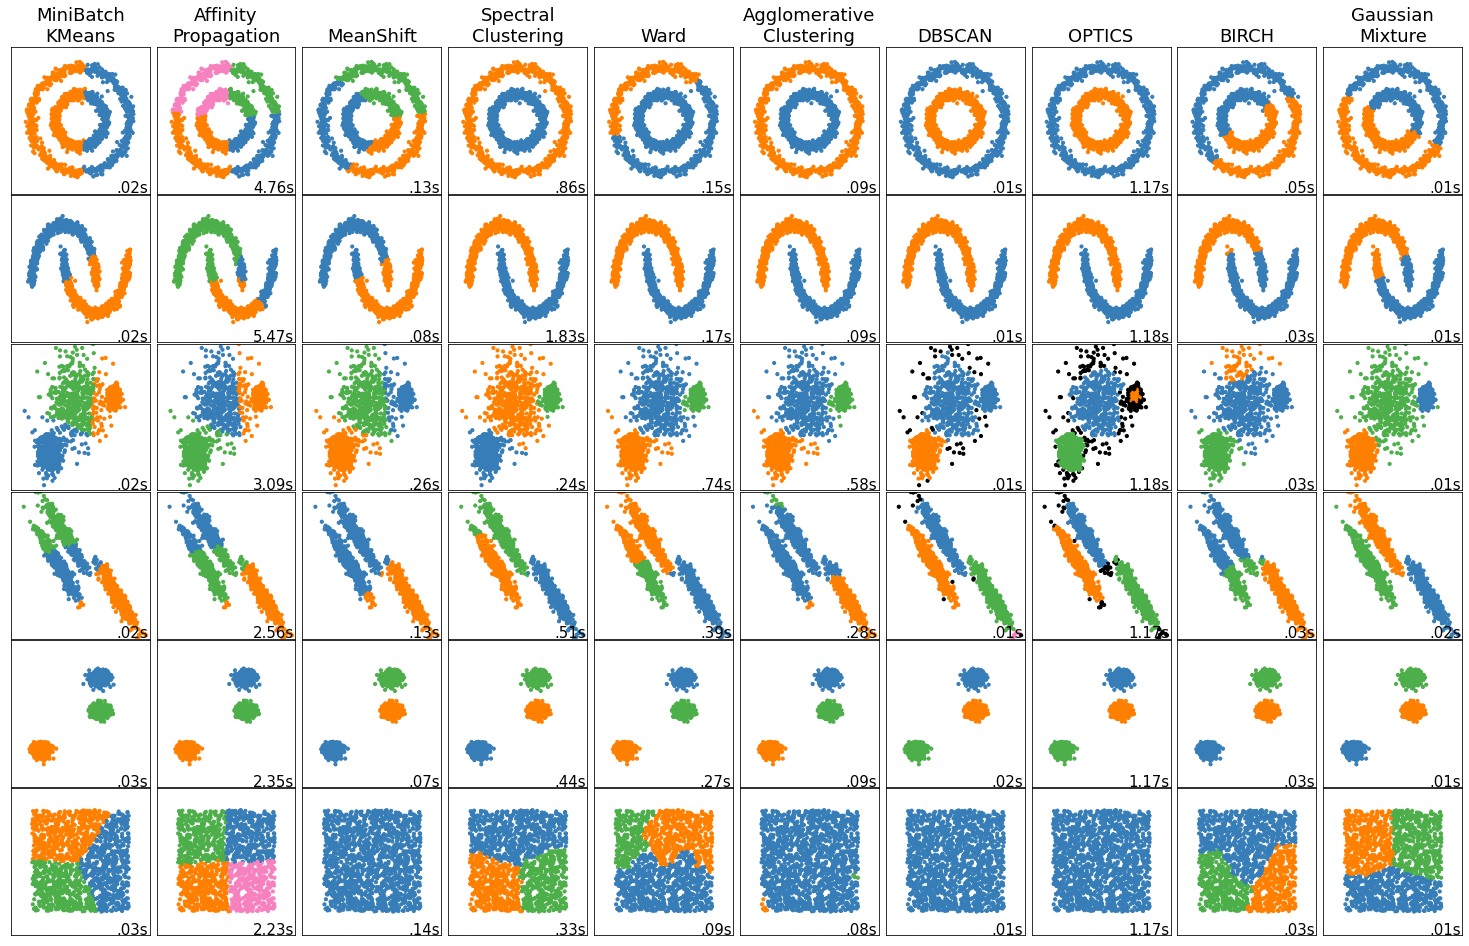

In [2]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from imblearn import under_sampling as us


np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"]
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()